# OVERVIEW

Many factors lead to a succesful harvest , while alot of these factors are difficult to control, measures can be taken to improve the potential of a succesful yield. Factors such as soil type,soil fertility ,Favourable weather condition , season and pesticides/pest control among others are factors Farmers pay keen interest to as they are more within their control and professional judgement.

This project takes look at most of these conditions , with focus on pesticide use, type and frequency. Pestiscide use must be controlled as too much deem crops damaged and unperishable , too little defeats the purpose of its use which is pest control.

This data is based on crops harvested by various farmers at the end of harvest season and our desire to predict the outcome of these harvest taking into account the factors presented to us. As well as the cause for the crop damages recorded

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('sample/train_yaOffsB.csv')

In [3]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
data.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


In [5]:
data.shape

(88858, 10)

In [6]:
data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [8]:
data.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [9]:
data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

### DATA ANALYSIS

In [10]:
result = pd.DataFrame(index = data.columns)
result['data_type']=data.dtypes
result['null_count']=data.isnull().sum()
result['unique_count']=data.nunique()
result

,data_type,null_count,unique_count
ID,object,0,88858
Estimated_Insects_Count,int64,0,71
Crop_Type,int64,0,2
Soil_Type,int64,0,2
Pesticide_Use_Category,int64,0,3
Number_Doses_Week,int64,0,20
Number_Weeks_Used,float64,9000,64
Number_Weeks_Quit,int64,0,51
Season,int64,0,3
Crop_Damage,int64,0,3


lets analyze the null values with other correlating factors so as to deduce what to fill it with

In [11]:
table = pd.pivot_table(data=data,index='Pesticide_Use_Category',values='Number_Weeks_Used',aggfunc=np.sum)
table

,Number_Weeks_Used
Pesticide_Use_Category,
1,0.0
2,1523262.0
3,762591.0


we can deduce that pesticide_use_category 1 is zero , that is pesticide wasnt used at all

In [12]:
table1 = pd.pivot_table(data=data,index='Soil_Type',values='Number_Weeks_Used',aggfunc=np.sum)
table1

,Number_Weeks_Used
Soil_Type,
0,1270043.0
1,1015810.0


In [13]:
maximum_no = data['Number_Weeks_Used'].mode()
maximum_no

0    20.0
dtype: float64

From the above, for Pesticide_Use_Category 1:- Number of weeks pesticide was used is zero
    
And for other Pesticide_Use_Category :- Number of weeks pesticide was used is considered as 20
    


In [15]:
for i in range(0,len(data)):
    if pd.isnull(data['Number_Weeks_Used'][i])==True:
        if (data['Pesticide_Use_Category'][i] == 1):
            data['Number_Weeks_Used'][i] = 0.0
        else:
            data['Number_Weeks_Used'][i] = 20.0

In [17]:
data.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

we have filled in the null nalues

In [20]:
# as a numerical value it should not be in float format
data=data.astype({'Number_Weeks_Used':'int64'})

lets see if there are more correlation between the columns 

In [21]:
cross1 = pd.crosstab(data['Soil_Type'],data['Crop_Type'])
cross1

Crop_Type,0,1
Soil_Type,,
0,28699,19425
1,34890,5844


In [23]:
cross2 = pd.crosstab(data['Soil_Type'],data['Pesticide_Use_Category'])
cross2

Pesticide_Use_Category,1,2,3
Soil_Type,,,
0,416,35246,12462
1,421,28463,11850


In [24]:
pd.crosstab(data['Crop_Damage'],data['Season'])

Season,1,2,3
Crop_Damage,,,
0,22493,36881,14864
1,3748,6115,2444
2,661,1214,438


In [26]:
pd.crosstab(data['Crop_Damage'],data['Crop_Type'])

Crop_Type,0,1
Crop_Damage,,
0,52778,21460
1,9204,3103
2,1607,706


In [27]:
pd.crosstab(data['Crop_Damage'],data['Soil_Type'])

Soil_Type,0,1
Crop_Damage,,
0,39841,34397
1,6953,5354
2,1330,983


In [28]:
pd.crosstab(data['Crop_Damage'],data['Pesticide_Use_Category'])

Pesticide_Use_Category,1,2,3
Crop_Damage,,,
0,118,56958,17162
1,554,6072,5681
2,165,679,1469


In [37]:
data.groupby(['Crop_Type']).count()

,ID,Estimated_Insects_Count,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Crop_Type,,,,,,,,,
0,63589,63589,63589,63589,63589,63589,63589,63589,63589
1,25269,25269,25269,25269,25269,25269,25269,25269,25269


#### SUMMARY

Crop damage 0 = healthy crop, crop_type 0 is the most resilient crop type to other factors , season_2 is the most favourable season, soil_type 0 is the most favourable soil

crop damage 1 = damage caused my pesticide, crop type 0 experienced more damage from pesticide as it is more on the dataset

crop damage 2 = caused by other factors

## GRAPHICAL ANALYSIS

### Univariate analysis

Text(0.5, 1.0, 'Seasons')

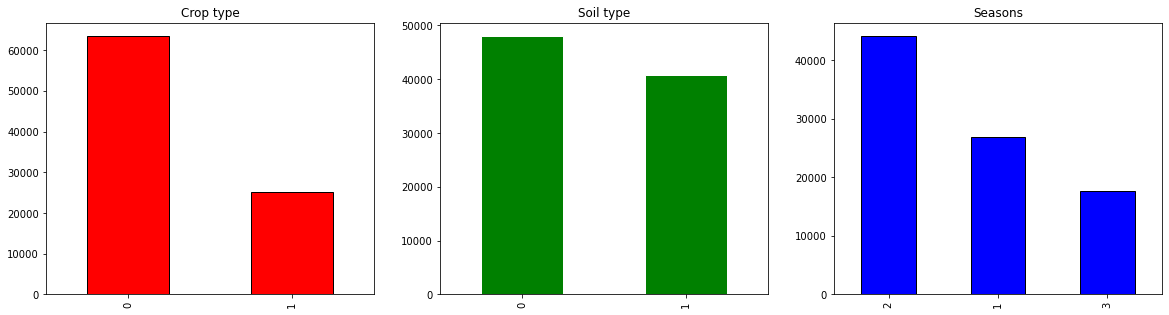

In [38]:
f,ax=plt.subplots(1,3,figsize=(20,5))
data['Crop_Type'].value_counts().plot.bar(ax=ax[0],edgecolor='black',color='red')
ax[0].set_title('Crop type')

data['Soil_Type'].value_counts().plot.bar(ax=ax[1],color='green',edgecolor='white')
ax[1].set_title('Soil type')

data['Season'].value_counts().plot.bar(ax=ax[2],color='blue',edgecolor='black')
ax[2].set_title('Seasons')

Text(0.5, 1.0, 'Weeks quit')

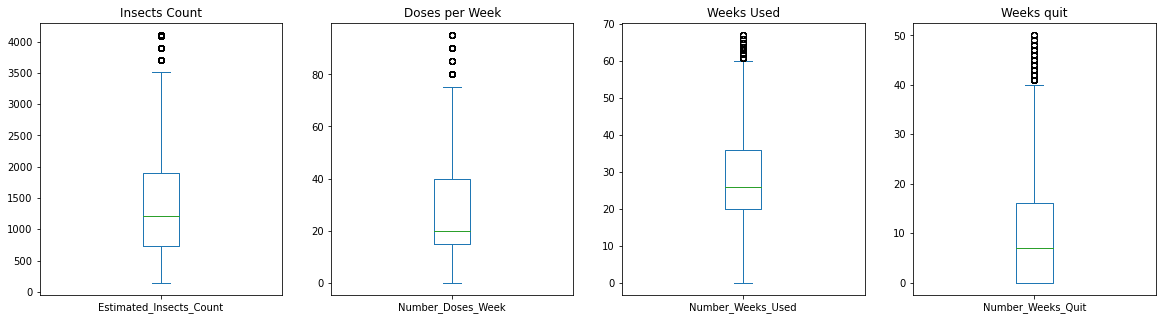

In [39]:
f,ax=plt.subplots(1,4,figsize=(20,5))
data['Estimated_Insects_Count'].plot.box(ax=ax[0])
ax[0].set_title('Insects Count')

data['Number_Doses_Week'].plot.box(ax=ax[1])
ax[1].set_title('Doses per Week')

data['Number_Weeks_Used'].plot.box(ax=ax[2])
ax[2].set_title('Weeks Used')

data['Number_Weeks_Quit'].plot.box(ax=ax[3])
ax[3].set_title('Weeks quit')

we have some outliers , which we will need to remove

Presence of outliers above 70 in Number_Doses_Week

Presence of outliers above 3500 in Estimated_Insects_Count

Presence of outliers above 60 in Number_Weeks_Used

Presence of outliers above 40 in Number_Weeks_Quit

In [43]:
data.loc[data['Estimated_Insects_Count']>3500,'Estimated_Insects_Count']=np.mean(data['Estimated_Insects_Count'])
data.loc[data['Number_Doses_Week']>69,'Number_Doses_Week']=np.mean(data['Number_Doses_Week'])
data.loc[data['Number_Weeks_Used']>60,'Number_Weeks_Used']=np.mean(data['Number_Weeks_Used'])
data.loc[data['Number_Weeks_Quit']>40,'Number_Weeks_Quit']=np.mean(data['Number_Weeks_Quit'])

In [44]:
# experience change in data types after removing outliers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  float64
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  float64
 6   Number_Weeks_Used        88858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  float64
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 6.8+ MB


In [45]:
data=data.astype({'Estimated_Insects_Count':'int64','Number_Doses_Week':'int64','Number_Weeks_Used':'int64','Number_Weeks_Quit':'int64'})

### Bivariate analysis

Text(0.5, 1.0, 'Plot of crop damage Vs Crop type')

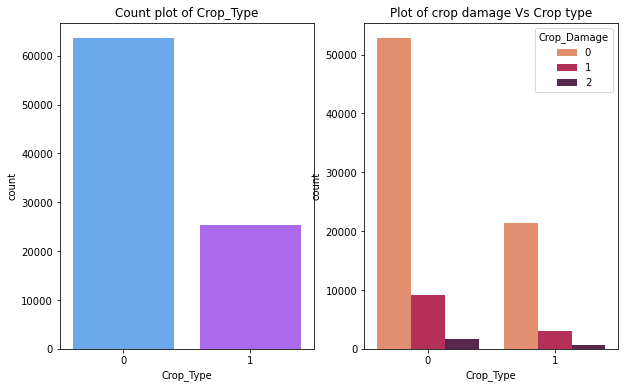

In [47]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(x = 'Crop_Type' , palette= 'cool', data= data) 
plt.title("Count plot of Crop_Type")

plt.subplot(1,2,2)
sns.countplot(data['Crop_Type'], hue = data['Crop_Damage'],palette="rocket_r")
plt.title("Plot of crop damage Vs Crop type")

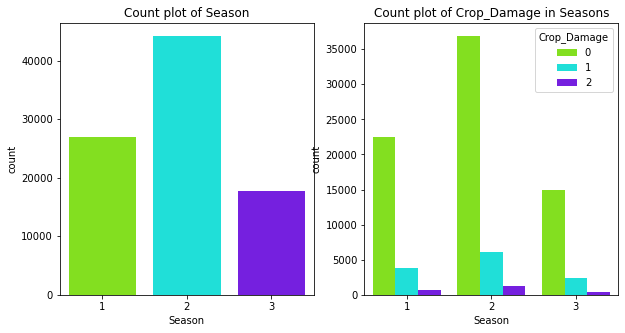

In [49]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(data['Season'], palette = 'hsv')
plt.title('Count plot of Season')
plt.subplot(1,2,2)
sns.countplot(data['Season'], hue = data['Crop_Damage'], palette = 'hsv')
plt.title('Count plot of Crop_Damage in Seasons')
plt.show()

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='Number_Doses_Week'>

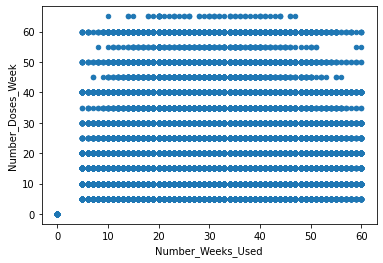

In [50]:
data.plot.scatter('Number_Weeks_Used','Number_Doses_Week')

The above scatter plot shows a linear relation between them. Correlation will tend to zero in this case

In [52]:
corr=[data['Number_Weeks_Used'].corr(data['Number_Doses_Week'])]
corr

[0.12649226871774746]

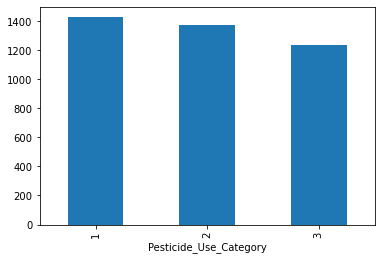

In [54]:
grp=data.groupby('Pesticide_Use_Category')['Estimated_Insects_Count'].mean().plot.bar()

The above is the bar graph between Pesticide_Use_Category and Estimated_Insects_Count.

As expected The crops where pesticides are not used have higher count of insects

Text(0.5, 1.0, 'Crop Damage per pesticide quit')

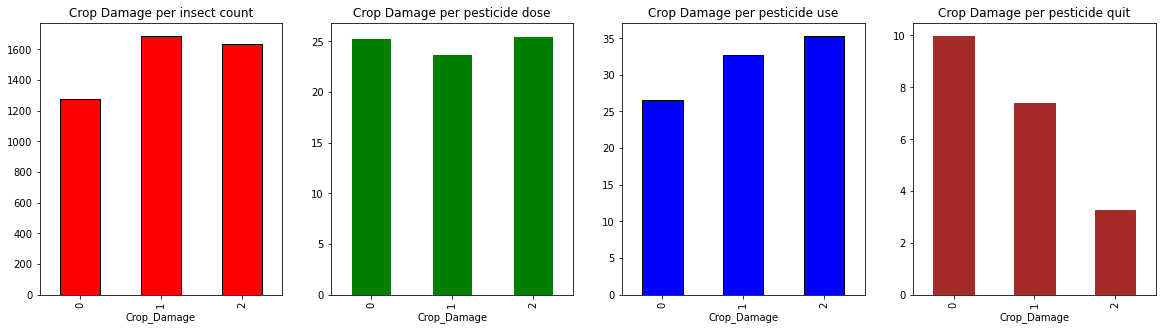

In [55]:
f,ax=plt.subplots(1,4,figsize=(20,5))
data.groupby('Crop_Damage')['Estimated_Insects_Count'].mean().plot.bar(ax=ax[0],edgecolor='black',color='red')
ax[0].set_title('Crop Damage per insect count')

data.groupby('Crop_Damage')['Number_Doses_Week'].mean().plot.bar(ax=ax[1],color='green',edgecolor='white')
ax[1].set_title('Crop Damage per pesticide dose')

data.groupby('Crop_Damage')['Number_Weeks_Used'].mean().plot.bar(ax=ax[2],color='blue',edgecolor='black')
ax[2].set_title('Crop Damage per pesticide use')

data.groupby('Crop_Damage')['Number_Weeks_Quit'].mean().plot.bar(ax=ax[3],color='brown',edgecolor='brown')
ax[3].set_title('Crop Damage per pesticide quit')

the more the insect count the more the damage to the crop 

the damage caused by pesticide is not by the dose but in the frequency of the usage 

Text(0, 0.5, 'Number_weeks_quit')

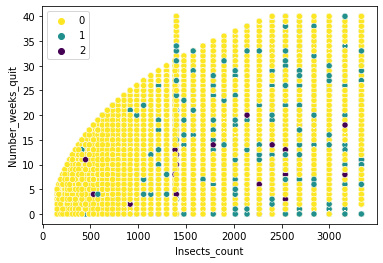

In [87]:
ax=sns.scatterplot(x=data['Estimated_Insects_Count'].values,y=data['Number_Weeks_Quit'].values,hue=data['Crop_Damage'].values,palette='viridis_r')
ax.set_xlabel('Insects_count')
ax.set_ylabel('Number_weeks_quit')

<AxesSubplot:>

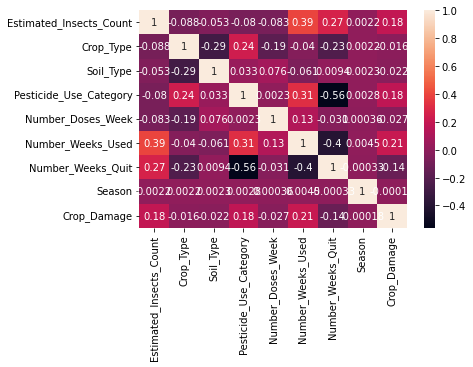

In [56]:
sns.heatmap(data.corr(),annot=True)

### Summary

Feature Estimated_Insects_Count has good correlation with Number_Weeks_Used

Seasons dont have much effect in survival percentage rate

Among pesticide categories, category 2(previously used) has highest Survival rate

Soil_Type1 has slightly higher survival rate than Type0

Crop_Type1 has slightly more survival percentage rate than Type0

### FEATURE ENGINEERING

Create a column total doses column which is the use of pesticides doses per week and number of weeks of its use. As well as anpther for Total days

In [57]:
data['Total_Doses']=data['Number_Doses_Week']*data['Number_Weeks_Used']
data[['Total_Doses','Number_Weeks_Used','Number_Doses_Week']].tail()

,Total_Doses,Number_Weeks_Used,Number_Doses_Week
88853,120,12,10
88854,200,20,10
88855,600,40,15
88856,250,25,10
88857,740,37,20


In [58]:
data['Total_Days']=data['Number_Weeks_Quit']+data['Number_Weeks_Used']
data[['Total_Days','Number_Weeks_Used','Number_Weeks_Quit']].tail()

,Total_Days,Number_Weeks_Used,Number_Weeks_Quit
88853,21,12,9
88854,58,20,38
88855,48,40,8
88856,43,25,18
88857,44,37,7


lets do further analysis with the new column

In [59]:
data.groupby('Crop_Damage')['Total_Doses'].mean()

Crop_Damage
0    691.872087
1    815.561469
2    966.491569
Name: Total_Doses, dtype: float64

crops are mostly damaged due to over dose of pesticides and even due to some other reasons.

In [60]:
data.groupby('Crop_Damage')['Total_Days'].mean()

Crop_Damage
0    36.518185
1    40.117819
2    38.594898
Name: Total_Days, dtype: float64

lets see the relationship between soil,crop,season together and number of weeks pesticide used.

Adding another column with value 1 everywhere for a required table below.

In [62]:
data['count']=1
data.pivot_table('count', ['Season','Soil_Type','Crop_Type'], ['Pesticide_Use_Category'],aggfunc='sum')

Pesticide_Use_Category          1        2       3
Season Soil_Type Crop_Type                        
1      0         0           53.0   6659.0  2014.0
                 1           74.0   4064.0  1726.0
       1         0           63.0   8587.0  1893.0
                 1           67.0      NaN  1702.0
2      0         0           99.0  10928.0  3296.0
                 1          125.0   6573.0  2954.0
       1         0           97.0  14154.0  3090.0
                 1          128.0      NaN  2766.0
3      0         0           31.0   4360.0  1259.0
                 1           34.0   2662.0  1213.0
       1         0           29.0   5722.0  1255.0
                 1           37.0      NaN  1144.0

In [63]:
data.pivot_table('count', ['Season','Soil_Type','Crop_Type'], ['Pesticide_Use_Category','Crop_Damage'],aggfunc='sum')

Pesticide_Use_Category         1                    2                      3  \
Crop_Damage                    0     1     2        0       1      2       0   
Season Soil_Type Crop_Type                                                     
1      0         0           7.0  39.0   7.0   5720.0   853.0   86.0  1218.0   
                 1          11.0  45.0  18.0   3832.0   210.0   22.0  1300.0   
       1         0           5.0  50.0   8.0   7706.0   789.0   92.0  1340.0   
                 1           8.0  46.0  13.0      NaN     NaN    NaN  1346.0   
2      0         0          18.0  68.0  13.0   9345.0  1414.0  169.0  2027.0   
                 1          14.0  84.0  27.0   6235.0   300.0   38.0  2192.0   
       1         0          16.0  68.0  13.0  12732.0  1283.0  139.0  2127.0   
                 1          18.0  77.0  33.0      NaN     NaN    NaN  2157.0   
3      0         0           5.0  18.0   8.0   3720.0   567.0   73.0   759.0   
                 1           5.0  16.0  13.0   2523.0   131.0    8.0   910.0   
       1         0           6.0  18.0   5.0   5145.0   525.0   52.0   882.0   
                 1           5.0  25.0   7.0      NaN     NaN    NaN   904.0   

Pesticide_Use_Category                    
Crop_Damage                     1      2  
Season Soil_Type Crop_Type                
1      0         0          626.0  170.0  
                 1          351.0   75.0  
       1         0          444.0  109.0  
                 1          295.0   61.0  
2      0         0          965.0  304.0  
                 1          615.0  147.0  
       1         0          774.0  189.0  
                 1          467.0  142.0  
3      0         0          400.0  100.0  
                 1          251.0   52.0  
       1         0          303.0   70.0  
                 1          190.0   50.0

### MODEL BUILDING

All the columns except Crop Damage are stored under feature_table

And Crop Damage values are stored are in target_values. StandardScaler is used from preprocessing of sklearn. It changes the values such that the standard deviation distribution from the mean equals one.Most values lies b/w -1 & 1

In [66]:
feature_table = data[["Estimated_Insects_Count","Crop_Type","Soil_Type","Pesticide_Use_Category","Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit","Season"]]

In [69]:
from sklearn import preprocessing
ft = preprocessing.StandardScaler().fit(feature_table)
feature_table = ft.transform(feature_table)
target_values = data["Crop_Damage"].values

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier('entropy',random_state=7)
kfold = KFold(n_splits=30, random_state=7,shuffle=True)
scores1 =cross_val_score(dt, feature_table, target_values, scoring='accuracy', cv=kfold)
scores1

array([0.7741391 , 0.75962188, 0.75320729, 0.75557056, 0.75388251,
       0.7535449 , 0.75422012, 0.74949359, 0.76873734, 0.76232275,
       0.743079  , 0.75860905, 0.74544227, 0.74409183, 0.73902768,
       0.76063471, 0.7501688 , 0.7498312 , 0.7498312 , 0.74611749,
       0.74510466, 0.74814315, 0.74442944, 0.74780554, 0.75118163,
       0.75658339, 0.74848076, 0.74375422, 0.75751435, 0.75312394])

In [73]:
scores1.mean(), scores1.std()

(0.7522564780362128, 0.007647156275085259)

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
kfold = KFold(n_splits=30, random_state=7,shuffle=True)
scores2=cross_val_score(rf, feature_table, target_values, scoring='accuracy', cv=kfold)
scores2

array([0.83794733, 0.8193788 , 0.81397704, 0.81431465, 0.81971641,
       0.81971641, 0.82072924, 0.81498987, 0.8227549 , 0.8264686 ,
       0.8126266 , 0.83051992, 0.81060095, 0.81667792, 0.81060095,
       0.82207968, 0.83288319, 0.82140446, 0.82174207, 0.82140446,
       0.82241729, 0.81296421, 0.81769075, 0.81465226, 0.82545577,
       0.82781904, 0.82613099, 0.80823768, 0.82066869, 0.81864235])

In [75]:
scores2.mean(),scores2.std()

(0.8201737487175733, 0.006717790311209124)

### TEST DATA SAMPLE

In [76]:
test=pd.read_csv("sample/test_pFkWwen.csv")

In [77]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

we can safely assume that the test data will require the same treatment as the previous dataset

In [80]:
for i in range(0,len(test)):
    if pd.isnull(test['Number_Weeks_Used'][i])==True:
        if (test['Pesticide_Use_Category'][i] == 1):
            test['Number_Weeks_Used'][i] = 0.0
        else:
            test['Number_Weeks_Used'][i] = 20.0

In [81]:
test.loc[test['Estimated_Insects_Count']>3500,'Estimated_Insects_Count']=np.median(test['Estimated_Insects_Count'])
test.loc[test['Number_Doses_Week']>69,'Number_Doses_Week']=np.mean(test['Number_Doses_Week'])
test.loc[test['Number_Weeks_Used']>60,'Number_Weeks_Used']=np.mean(test['Number_Weeks_Used'])
test.loc[test['Number_Weeks_Quit']>40,'Number_Weeks_Quit']=np.mean(test['Number_Weeks_Quit'])

In [82]:
test=test.astype({'Estimated_Insects_Count':'int64','Number_Doses_Week':'int64','Number_Weeks_Used':'int64','Number_Weeks_Quit':'int64'})

### Prediction

In [83]:
test_features=test[["Estimated_Insects_Count","Crop_Type","Soil_Type","Pesticide_Use_Category","Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit","Season"]]

In [84]:
test_features = ft.transform(test_features)

VOTING CLASSIFIER

It is a wrapper for set of different algorithms that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm. It chooses the best predicting model for the dataset.It yields better performance than any single algorithm

intend to input Decison tree and Random forest 

In [85]:
from sklearn.ensemble import VotingClassifier

In [86]:
vc = VotingClassifier(estimators=[('dt',dt),('rf',rf)],voting='hard')
result=cross_val_score(vc, feature_table, target_values, scoring='accuracy', cv=kfold)
result

array([0.83862255, 0.82343011, 0.81431465, 0.81634031, 0.82781904,
       0.82680621, 0.82343011, 0.81701553, 0.82781904, 0.82950709,
       0.82005402, 0.83423363, 0.81465226, 0.81634031, 0.80992573,
       0.82343011, 0.83423363, 0.82072924, 0.82174207, 0.82511816,
       0.82140446, 0.81904119, 0.81971641, 0.81735314, 0.82343011,
       0.8298447 , 0.82950709, 0.80958812, 0.82776089, 0.82100642])

In [91]:
result.mean(),result.std()

(0.8228072109757859, 0.006871267250865132)

In [90]:
# Predicting the test target values i.e. Crop_Damage in test dataset
vc=vc.fit(feature_table,target_values)

In [92]:
test_Crop_Damage = vc.predict(test_features)

In [93]:
solution = pd.DataFrame(test_Crop_Damage)

In [95]:
id = test['ID']
sample_solution = pd.concat([id,solution],axis=1)
sample_solution.columns = ['ID','Crop_Damage']

In [96]:
sample_solution

,ID,Crop_Damage
0,F00000002,0
1,F00000007,0
2,F00000011,0
3,F00000013,0
4,F00000014,0
...,...,...
59305,F00155937,0
59306,F00155940,0
59307,F00155941,0
59308,F00155943,0
